In [1]:
## same data as the rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/thaku/Downloads/m23/RF/Travel.csv")

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Data cleaning

In [6]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [7]:
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [8]:
df['Gender'] = df['Gender'].replace("Fe Male","Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("Single","Unmarried")

In [9]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [10]:
df[features_with_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   DurationOfPitch           4637 non-null   float64
 3   NumberOfFollowups         4843 non-null   float64
 4   PreferredPropertyStar     4862 non-null   float64
 5   NumberOfTrips             4748 non-null   float64
 6   NumberOfChildrenVisiting  4822 non-null   float64
 7   MonthlyIncome             4655 non-null   float64
dtypes: float64(7), object(1)
memory usage: 305.6+ KB


In [11]:
df[features_with_na].select_dtypes(exclude = 'O').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
## mean and 50  percentile arae close so mean and median both can be fine

In [13]:
df.Age.fillna(df.Age.median(), inplace = True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)
df["DurationOfPitch"].fillna(df.DurationOfPitch.median(), inplace = True)
df["NumberOfFollowups"].fillna(df.NumberOfFollowups.mode()[0], inplace = True)
df["PreferredPropertyStar"].fillna(df.PreferredPropertyStar.mode()[0], inplace = True)
df["NumberOfTrips"].fillna(df.NumberOfTrips.median(), inplace = True)
df["NumberOfChildrenVisiting"].fillna(df.NumberOfChildrenVisiting.mode()[0], inplace = True)
df["MonthlyIncome"].fillna(df.MonthlyIncome.median(), inplace = True)

In [14]:
df.drop('CustomerID',axis =1 , inplace = True)

In [15]:
num_features = [features for features in df.columns if df[features].dtype != 'O']
print(len(num_features))
cat_features = [features for features in df.columns if df[features].dtype == 'O']
print(len(cat_features))

13
6


In [16]:
discrete_features = [features for features in num_features if df[features].nunique() <= 25]
print(len(discrete_features))
cat_features = [features for features in num_features  if features not in discrete_features]
print(len(cat_features))

10
3


In [17]:
X= df.drop('ProdTaken', axis =1)
y = df['ProdTaken']


In [18]:
y.value_counts()
## though heavily imbalancde but rule based models are not affeected by it

ProdTaken
0    3968
1     920
Name: count, dtype: int64

### train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

### feature scaling and ohe

In [20]:
num_features = X.select_dtypes(exclude = 'O').columns
cat_features = X.select_dtypes(include = 'O').columns

In [21]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop = 'first')

In [24]:
transformer = ColumnTransformer(
[
  ("numeric" ,  numeric_transformer, num_features),
  ("ohe" , ohe_transformer ,cat_features)
]   
)

In [25]:
transformer

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')),
                                ('ohe', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])

In [26]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [28]:
# !pip install xgboost

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score , roc_auc_score

In [31]:
models = {
 "dt" : DecisionTreeClassifier(),
 "rf" : RandomForestClassifier(),
 "logistic" : LogisticRegression(),
 "ababoost" :  AdaBoostClassifier(), 
 "gradboost" : GradientBoostingClassifier(),
 "xgboost" : XGBClassifier()
}

In [32]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    ##predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## train set perof
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

    ## train set perf
    model_train_accuracy = accuracy_score(y_train , y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train_pred, y_train)
    model_train_recall = recall_score(y_train_pred, y_train)
    model_train_roc_auc_score =  roc_auc_score(y_train_pred, y_train)


    ## test set perf
    model_test_accuracy = accuracy_score(y_test , y_test_pred)
    model_test_f1 =f1_score(y_test, y_test_pred)
    model_train_precision = precision_score(y_test_pred, y_test)
    model_test_recall = recall_score(y_test_pred, y_test)
    model_test_roc_auc_score =roc_auc_score(y_test_pred, y_test)

    ##############model name and priniting the metrics
    print("####################################################### \n")
    print("metrics for  model : ",list(models.keys())[i])
    

    print("model accuracy on train set ")
    print("- accuracy : {:.4f}".format(model_train_accuracy))
    print("- f1 score: {:4f}".format(model_train_f1))
    print("- recall {:.4f}".format(model_train_recall))
    print("- roc_auc_Score {:.4f}".format(model_train_roc_auc_score))

    print("---------------------------------------------------------")

    print("- accuracy {:.4f}".format(model_test_accuracy))
    print("- f1 score {:.4f}".format(model_test_f1))
    print("- recall {:.4f}".format(model_test_recall))
    print("- roc-auc-score {:.4f}".format(model_test_roc_auc_score))

####################################################### 

metrics for  model :  dt
model accuracy on train set 
- accuracy : 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9172
- f1 score 0.7793
- recall 0.8125
- roc-auc-score 0.8763
####################################################### 

metrics for  model :  rf
model accuracy on train set 
- accuracy : 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9172
- f1 score 0.7412
- recall 0.9508
- roc-auc-score 0.9316
####################################################### 

metrics for  model :  logistic
model accuracy on train set 
- accuracy : 0.8460
- f1 score: 0.425573
- recall 0.6991
- roc_auc_Score 0.7791
---------------------------------------------------------
- accuracy 0.8354
- f1 score 0.4103
- recall 0.6829
- roc-auc-score 0.7661
###################

### HPM tuning 

In [37]:
rf_params = {
"max_depth":[5,8,9,10,None],
"max_features": [5,7,"auto",8],
"min_samples_split" : [2,8,15,20],
"n_estimators" : [100,200,500,1000],
}

adaboost_params = {
    "n_estimators" : [50,60,70,80,90],
    "algorithm" :  ["SAMME","SAMME.R"]

}
gradient_params = {
 "loss" : ['log_loss', 'deviance', 'exponential'],
 "criterion" : ["friedman_mse", "squared_error", 'mse'],
 "min_samples_split" : [2, 8 ,15,20],
"n_estimators" : [100,200,500,1000],
"max_depth" : [5,8,15,10,None]
}

xgb_params = {
"learning_rate" : [5,8,15,10,None],
"max_depth" : [5,7,"auto",8],
"n_estimators" : [1000,2000,3000],
"colsample_bytree" : [0.5, 0.8, 1, 0.3, 0.4]
}




In [38]:
rf_params

{'max_depth': [5, 8, 9, 10, None],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [39]:
randomcv_models = [
('rf',RandomForestClassifier(), rf_params),
('ababoost',AdaBoostClassifier(), adaboost_params),
("gradboost",GradientBoostingClassifier(),gradient_params),
("xgb",  XGBClassifier(), xgb_params)
]

In [40]:
model_params = {}

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator = model, n_iter = 100, cv = 3, verbose = 2, n_jobs = -1,param_distributions = param)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [43]:
for name in model_params:
    print("best params for model: "+name+"  are::")
    print(model_params[name])

best params for model: rf  are::
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
best params for model: ababoost  are::
{'n_estimators': 80, 'algorithm': 'SAMME'}
best params for model: gradboost  are::
{'n_estimators': 200, 'min_samples_split': 20, 'max_depth': None, 'loss': 'log_loss', 'criterion': 'friedman_mse'}
best params for model: xgb  are::
{'n_estimators': 1000, 'max_depth': 7, 'learning_rate': None, 'colsample_bytree': 0.8}


In [45]:
##training model again by using best param
models = {
"rf_model" :  RandomForestClassifier(n_estimators = 200,min_samples_split = 2 , max_features =8, max_depth =None ),
"adaboosst" : AdaBoostClassifier(n_estimators = 80, algorithm= 'SAMME'),
"gradboostare" : GradientBoostingClassifier(n_estimators =  500, min_samples_split= 15, max_depth = 15, loss = 'exponential', criterion = 'friedman_mse')
,"xbd boost" : XGBClassifier(n_estimators = 1000, max_depth =  7, learning_rate = None, colsample_bytree = 0.8)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ## predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

    ## train set perf
    model_train_accuracy = accuracy_score(y_train , y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred,average = 'weighted')
    model_train_precision = precision_score(y_train_pred, y_train)
    model_train_recall = recall_score(y_train_pred, y_train)
    model_train_roc_auc_score =  roc_auc_score(y_train_pred, y_train)


    ## test set perf
    model_test_accuracy = accuracy_score(y_test , y_test_pred)
    model_test_f1 =f1_score(y_test, y_test_pred, average = 'weighted')
    ## weighted to give perofromce based on both precision and reacall
    model_train_precision = precision_score(y_test_pred, y_test)
    model_test_recall = recall_score(y_test_pred, y_test)
    model_test_roc_auc_score =roc_auc_score(y_test_pred, y_test)

    ## model identifier = 
    print(list(models.keys())[i])
    

    print("Model performance for training set ::")
    print("- accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1 score: {:4f}".format(model_train_f1))
    print("- recall {:.4f}".format(model_train_recall))
    print("- roc_auc_Score {:.4f}".format(model_train_roc_auc_score))

    print("---------------------------------------------------------")

    print("- accuracy {:.4f}".format(model_test_accuracy))
    print("- f1 score {:.4f}".format(model_test_f1))
    print("- recall {:.4f}".format(model_test_recall))
    print("- roc-auc-score {:.4f}".format(model_test_roc_auc_score))

rf_model
Model performance for training set ::
- accuracy: 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9294
- f1 score 0.9249
- recall 0.9420
- roc-auc-score 0.9347
adaboosst
Model performance for training set ::
- accuracy: 0.8465
- f1 score: 0.813195
- recall 0.7699
- roc_auc_Score 0.8107
---------------------------------------------------------
- accuracy 0.8364
- f1 score 0.7977
- recall 0.7818
- roc-auc-score 0.8107
gradboostare
Model performance for training set ::
- accuracy: 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9652
- f1 score 0.9642
- recall 0.9758
- roc-auc-score 0.9694
xbd boost
Model performance for training set ::
- accuracy: 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9519
- f1 score 0.95

### roc aur curve

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
plt.figure()
auc_models  = [
{
"label" :'Random forest classifier',
"model" : RandomForestClassifier(n_estimators = 200,min_samples_split = 2 , max_features =8, max_depth =None ) ,
"auc" : 0.9382
},
{
"label" :'adaboost classifier',
"model" : AdaBoostClassifier(n_estimators = 80, algorithm = 'SAMME') ,
"auc" : 0.8107
},
{
"label": "gradboostare" ,
"model":GradientBoostingClassifier(n_estimators =  500, min_samples_split= 15, max_depth = 15, loss = 'exponential', criterion = 'friedman_mse'),
"auc":0.9724
},
{
"label": "xgb" ,
"model":XGBClassifier(n_estimators = 1000, max_depth =  7, learning_rate = None, colsample_bytree = 0.8),
"auc":0.95
} 
]

<Figure size 640x480 with 0 Axes>

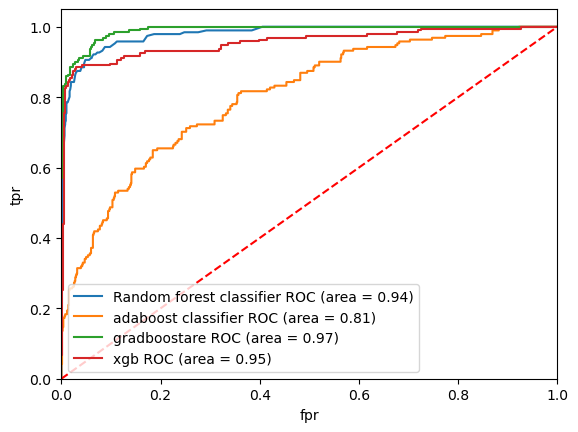

In [50]:
for algo in auc_models:
    model = algo["model"]
    model.fit(X_train,y_train)
    ### fpr , tpr, 
    fpr,tpr, threshold = roc_curve(y_test , model.predict_proba(X_test)[:,1])
    ## area under curve
    plt.plot(fpr, tpr, label = "%s ROC (area = %0.2f)" % (algo['label'], algo['auc']))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc = 'lower left' )
plt.savefig("test.png")
plt.show()